# OpenData - Simple File Access

There are a whole slew of files available on CERN's open data server. Lets just look at one and access it directly and via ServiceX. Note, in this case, ServiceX does not provide any real performance benefit - one file does not a parallel job make!

In [1]:
data_location = "root://eospublic.cern.ch//eos/opendata/atlas/OutreachDatasets/2020-01-22/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root"

## Using UPROOT

We can open it with `uproot`:

In [2]:
import uproot
f = uproot.open(data_location)

In [3]:
print(f['mini'].keys())

['runNumber', 'eventNumber', 'channelNumber', 'mcWeight', 'scaleFactor_PILEUP', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'scaleFactor_PhotonTRIGGER', 'trigE', 'trigM', 'trigP', 'lep_n', 'lep_truthMatched', 'lep_trigMatched', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID', 'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased', 'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt', 'jet_trueflav', 'jet_truthMatched', 'jet_MV2c10', 'photon_n', 'photon_truthMatched', 'photon_trigMatched', 'photon_pt', 'photon_eta', 'photon_phi', 'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20', 'photon_convType', 'tau_n', 'tau_pt', 'tau_eta', 'tau_phi', 'tau_E', 'tau_isTightID', 'tau_truthMatched', 'tau_trigMatched', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst', 'met_et_syst', 'jet_pt_syst', 'p

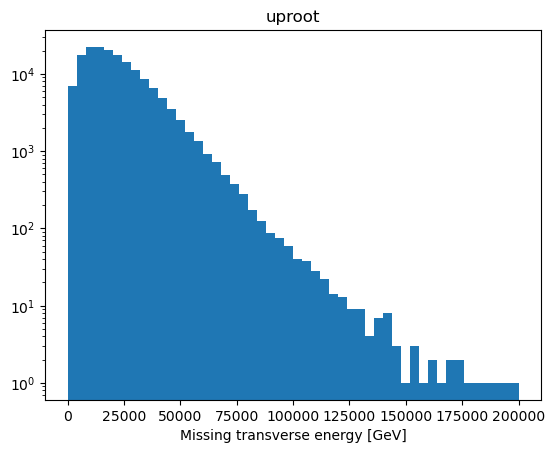

In [4]:
import matplotlib.pyplot as plt
met_et = f['mini']["met_et"].array()

plt.hist(met_et, bins=50, range=(0, 0.2e6))
plt.xlabel("Missing transverse energy [GeV]")
plt.yscale('log')
plt.title('uproot')
plt.show()

In [5]:
print(met_et[0:10])

[2.41e+04, 5.87e+04, 2.72e+04, 3e+04, ... 8.32e+03, 3.7e+04, 2.09e+04, 5.74e+04]


## Using ServiceX

Next, lets use ServiceX:

In [6]:
from func_adl_servicex import ServiceXSourceUpROOT
ds = ServiceXSourceUpROOT(data_location, "mini")
print(ds)

ServiceXSourceUpROOT


In [7]:
sx_met_et = (ds.Select("lambda e: {'met_et': e.met_et}")
             .AsAwkwardArray("met_et")
             .value()
)

In [8]:
print(f'From ServiceX: {sx_met_et["met_et"][0:10]}')
print(f'from uproot:   {met_et[0:10]}')

From ServiceX: [2.41e+04, 5.87e+04, 2.72e+04, 3e+04, ... 8.32e+03, 3.7e+04, 2.09e+04, 5.74e+04]
from uproot:   [2.41e+04, 5.87e+04, 2.72e+04, 3e+04, ... 8.32e+03, 3.7e+04, 2.09e+04, 5.74e+04]


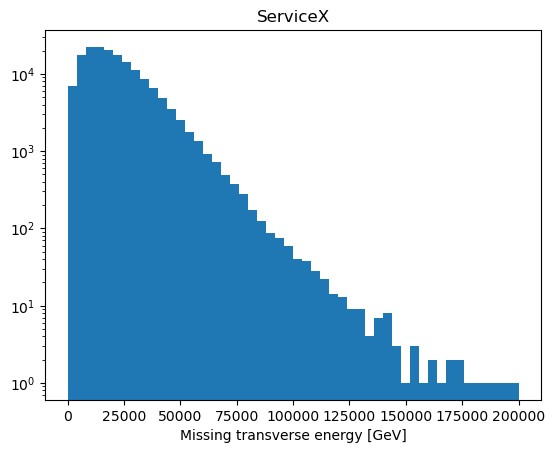

In [9]:
plt.hist(sx_met_et["met_et"], bins=50, range=(0, 0.2e6))
plt.xlabel("Missing transverse energy [GeV]")
plt.title('ServiceX')
plt.yscale('log')
plt.show()